In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings   # to avoid the warnings during executing the program
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/content/drive/MyDrive/data analytic -20220106T192432Z-001/data analytic/heart (1).csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


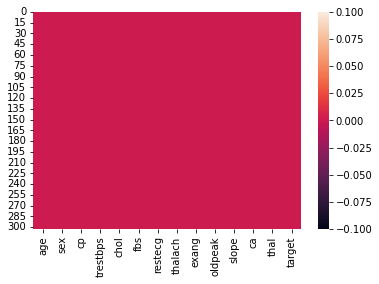

In [3]:
# Check the null values 
sns.heatmap(df.isnull())
plt.show()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# Selecting the input and output variable from dataset
X = df.drop("target",axis=1)  # Input variable
Y = df["target"]  #output variable

In [6]:
# Test Train Split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [7]:
# Create the define model function
def create_model(model):
  model.fit(X_train,Y_train)
  Y_pred = model.predict(X_test)
  print("Classification Report : ")
  print(classification_report(Y_test,Y_pred))
  print("Confusion Matrix : ")
  print(confusion_matrix(Y_test,Y_pred))
  return model

In [8]:
# Ensembling Technique
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [9]:
# 1.)  Create the object of LogisticRegression() class
lr = LogisticRegression()

In [10]:
# 2.) Create object of DecisionTreeClassifier(GINI INDEX)
dt1 = DecisionTreeClassifier() # by default take gini index

In [11]:
# 3.) Create the object of DecisionTreeClassifier(Entropy)
dt2 = DecisionTreeClassifier(criterion="entropy")

In [12]:
# create the model list
model_list = [("LogisticRegression",lr),("DecisionTreeClassifierGiniIndex",dt1),("DecisionTreeClassifierEntropy",dt2)]

In [13]:
# Naive Aggregation Hard Voting
# We importing voting classifier
from sklearn.ensemble import VotingClassifier
# Create the object VotingClassifier
vc = VotingClassifier(estimators=model_list) # By default take Hard Voting

In [14]:
# Call the function
vc = create_model(vc)

Classification Report : 
              precision    recall  f1-score   support

           0       0.70      0.76      0.73        41
           1       0.79      0.74      0.76        50

    accuracy                           0.75        91
   macro avg       0.75      0.75      0.75        91
weighted avg       0.75      0.75      0.75        91

Confusion Matrix : 
[[31 10]
 [13 37]]


In [15]:
# Naive Aggregation Soft Voting
vc1 = VotingClassifier(estimators=model_list,voting="soft")

In [16]:
# Call the function
vc1 = create_model(vc1)

Classification Report : 
              precision    recall  f1-score   support

           0       0.69      0.76      0.72        41
           1       0.78      0.72      0.75        50

    accuracy                           0.74        91
   macro avg       0.74      0.74      0.74        91
weighted avg       0.74      0.74      0.74        91

Confusion Matrix : 
[[31 10]
 [14 36]]


In [19]:
# Bootstapping Ensembling Technique
# 1. Bagging method
from sklearn.ensemble import BaggingClassifier

In [29]:
# Create the object of BaggingClassifer
bc = BaggingClassifier(LogisticRegression(),n_estimators = 10, max_samples=100,random_state=1)

In [30]:
X_train.shape

(212, 13)

In [31]:
bc = create_model(bc)

Classification Report : 
              precision    recall  f1-score   support

           0       0.81      0.71      0.75        41
           1       0.78      0.86      0.82        50

    accuracy                           0.79        91
   macro avg       0.79      0.78      0.79        91
weighted avg       0.79      0.79      0.79        91

Confusion Matrix : 
[[29 12]
 [ 7 43]]


In [32]:
# Pasting :
bc1 = BaggingClassifier(LogisticRegression(),n_estimators=10,max_samples=100,random_state=1,bootstrap=False)
# False means by default it take " True " Bagging Classifier

In [33]:
# Call the function
bc1 = create_model(bc1)

Classification Report : 
              precision    recall  f1-score   support

           0       0.79      0.73      0.76        41
           1       0.79      0.84      0.82        50

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91

Confusion Matrix : 
[[30 11]
 [ 8 42]]


In [34]:
# Random Forest Tree:
bc2 = BaggingClassifier(DecisionTreeClassifier(),n_estimators=10,max_samples=100,random_state=1)

In [35]:
# Call the function
bc2 = create_model(bc2)

Classification Report : 
              precision    recall  f1-score   support

           0       0.67      0.73      0.70        41
           1       0.76      0.70      0.73        50

    accuracy                           0.71        91
   macro avg       0.71      0.72      0.71        91
weighted avg       0.72      0.71      0.71        91

Confusion Matrix : 
[[30 11]
 [15 35]]


In [36]:
# RandomForstTree Classifier
from sklearn.ensemble import RandomForestClassifier
# Create the object of RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10,max_features=6,random_state=1)

In [37]:
# Call the function 
rfc = create_model(rfc)

Classification Report : 
              precision    recall  f1-score   support

           0       0.68      0.78      0.73        41
           1       0.80      0.70      0.74        50

    accuracy                           0.74        91
   macro avg       0.74      0.74      0.74        91
weighted avg       0.74      0.74      0.74        91

Confusion Matrix : 
[[32  9]
 [15 35]]
